In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [2]:
df= pd.read_csv('houseprice.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df.shape

(1460, 80)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.isnull().sum().values

array([   0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    8,    8,    0,    0,    0,   37,   37,   38,   37,
          0,   38,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  690,   81,   81,   81,    0,    0,   81,   81,    0,    0,
          0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,    0,
          0,    0,    0], dtype=int64)

In [7]:
df[df.select_dtypes(include= np.number).columns].nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [8]:
df = df.drop(['FireplaceQu','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [9]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


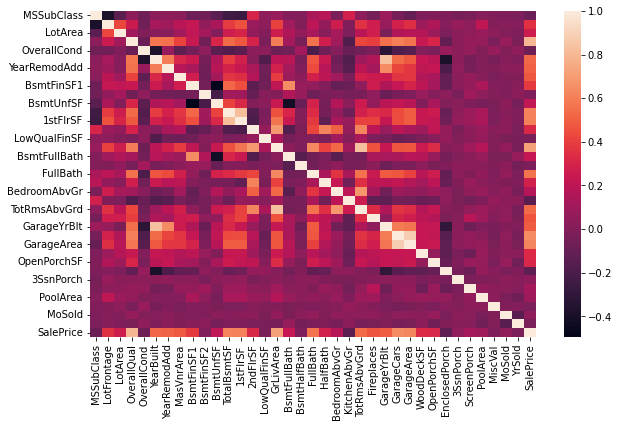

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr())
plt.show()

In [11]:
df.corrwith(df['SalePrice'])

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float64

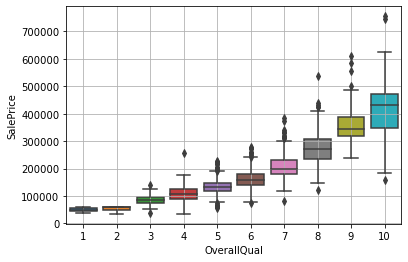

In [12]:
sns.boxplot(data=df,x='OverallQual',y='SalePrice')
plt.grid()
plt.show()

In [13]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

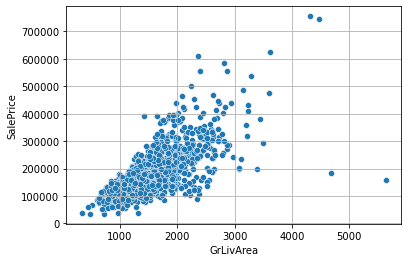

In [14]:
sns.scatterplot(data=df,x='GrLivArea',y='SalePrice')
plt.grid()
plt.show()

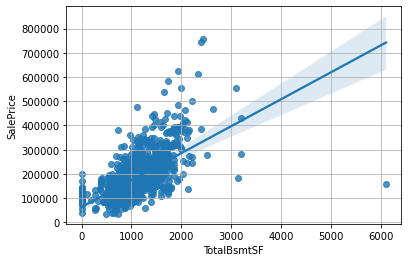

In [15]:
sns.regplot(data=df,x='TotalBsmtSF',y='SalePrice')
plt.grid()
plt.show()

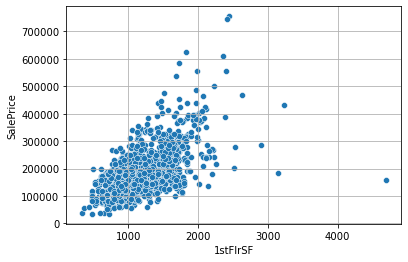

In [16]:
sns.scatterplot(data=df,x='1stFlrSF',y='SalePrice')
plt.grid()
plt.show()

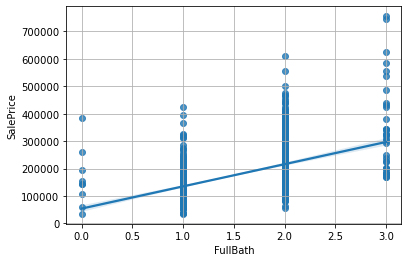

In [17]:
sns.regplot(data=df,x='FullBath',y='SalePrice')
plt.grid()
plt.show()

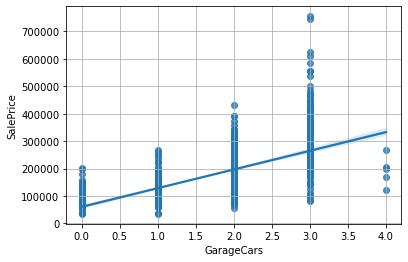

In [18]:
sns.regplot(data=df,x='GarageCars',y='SalePrice')
plt.grid()
plt.show()

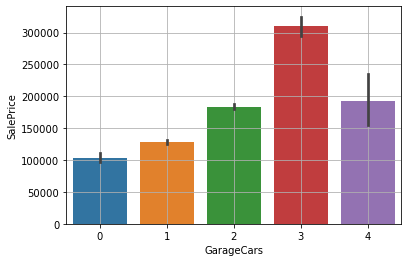

In [19]:
sns.barplot(data=df,x='GarageCars',y='SalePrice')
plt.grid()
plt.show()

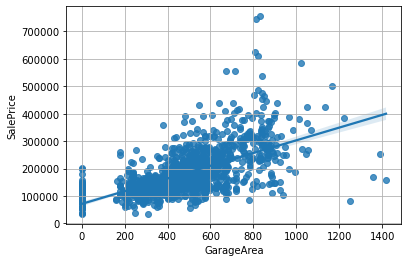

In [20]:
sns.regplot(data=df,x='GarageArea',y='SalePrice')
plt.grid()
plt.show()

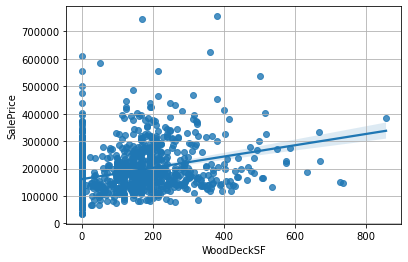

In [21]:
sns.regplot(data=df,x='WoodDeckSF',y='SalePrice')
plt.grid()
plt.show()

In [22]:
df.fillna(method='ffill',inplace=True)

In [23]:
df = df[['SalePrice','OverallQual','GarageArea','GarageCars','1stFlrSF','GrLivArea']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1460 non-null   int64
 1   OverallQual  1460 non-null   int64
 2   GarageArea   1460 non-null   int64
 3   GarageCars   1460 non-null   int64
 4   1stFlrSF     1460 non-null   int64
 5   GrLivArea    1460 non-null   int64
dtypes: int64(6)
memory usage: 79.8 KB


In [25]:
X_train,X_test = train_test_split(df,test_size=0.25,random_state=20)

In [26]:
X = X_train.drop('SalePrice',axis=1)
y = X_train['SalePrice']
X

,OverallQual,GarageArea,GarageCars,1stFlrSF,GrLivArea
Id,,,,,
435,4,0,0,630,630
181,6,440,2,769,1525
532,6,502,2,751,1362
878,9,738,3,1462,2224
300,6,300,1,1152,1152
...,...,...,...,...,...
925,6,612,2,1686,1686
1248,6,888,3,1034,1034
272,7,439,2,1363,1363


In [27]:
std = StandardScaler()
X = std.fit_transform(X)

In [28]:
X_train = std.fit_transform(X_test.drop('SalePrice',axis=1))
y_test = X_test['SalePrice']

In [29]:
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

In [30]:
predicted = lr_model.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),metrics.r2_score(y_test,predicted))

37676.06187712131 0.779809824564115


In [31]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X,y)

RandomForestRegressor()

In [32]:
predicted = rf_model.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),metrics.r2_score(y_test,predicted))

32967.07293046636 0.831411590973858


In [33]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X,y)

DecisionTreeRegressor()

In [34]:
predicted = tree_model.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),metrics.r2_score(y_test,predicted))

38356.10671990712 0.7717893167995703


predicted = ridge.predict(X_prepared)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),metrics.r2_score(y_test,predicted))


In [35]:
svm = SVC()
svm.fit(X,y)

SVC()

In [36]:
predicted = svm.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),metrics.r2_score(y_test,predicted))


48832.816933130714 0.6300947550544852


In [37]:
test = df[['OverallQual','GarageArea','GarageCars','1stFlrSF','GrLivArea']]

In [38]:
test.fillna(method='ffill',inplace=True)
test

C:\Users\tript\AppData\Local\Temp\ipykernel_35476\2119183134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.fillna(method='ffill',inplace=True)


,OverallQual,GarageArea,GarageCars,1stFlrSF,GrLivArea
Id,,,,,
1,7,548,2,856,1710
2,6,460,2,1262,1262
3,7,608,2,920,1786
4,7,642,3,961,1717
5,8,836,3,1145,2198
...,...,...,...,...,...
1456,6,460,2,953,1647
1457,6,500,2,2073,2073
1458,7,252,1,1188,2340


In [39]:
test = std.fit_transform(test)
test

array([[ 0.65147924,  0.35100032,  0.31172464, -0.79343379,  0.37033344],
       [-0.07183611, -0.06073101,  0.31172464,  0.25714043, -0.48251191],
       [ 0.65147924,  0.63172623,  0.31172464, -0.62782603,  0.51501256],
       ...,
       [ 0.65147924, -1.03391416, -1.02685765,  0.06565646,  1.56964722],
       [-0.79515147, -1.09005935, -1.02685765, -0.21898188, -0.83278768],
       [-0.79515147, -0.9216238 , -1.02685765,  0.2416147 , -0.49393395]])

In [40]:
new_predicted = lr_model.predict(test)
new_prediction = rf_model.predict(test)
new_pred = tree_model.predict(test)
predicted = svm.predict(test)


In [41]:
y_test = df['SalePrice']

In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test,new_predicted)),1-metrics.mean_absolute_percentage_error(y_test,new_predicted))

39255.84768528953 0.8412139371260989


In [43]:
print(np.sqrt(metrics.mean_squared_error(y_test,new_prediction)),1-metrics.mean_absolute_percentage_error(y_test,new_prediction))

22565.943194948602 0.9138012880819921


In [44]:
print(np.sqrt(metrics.mean_squared_error(y_test,new_pred)),1-metrics.mean_absolute_percentage_error(y_test,new_pred))

24498.898148726104 0.9288024434416445


In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),1-metrics.mean_absolute_percentage_error(y_test,predicted))

46458.20962309634 0.8132538324712237


In [46]:
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)),1-metrics.mean_absolute_percentage_error(y_test,predicted))

46458.20962309634 0.8132538324712237


In [47]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,SalePrice,OverallQual,GarageArea,GarageCars,1stFlrSF,GrLivArea
Id,,,,,,
1,208500,7,548,2,856,1710
2,181500,6,460,2,1262,1262
3,223500,7,608,2,920,1786
4,140000,7,642,3,961,1717
5,250000,8,836,3,1145,2198


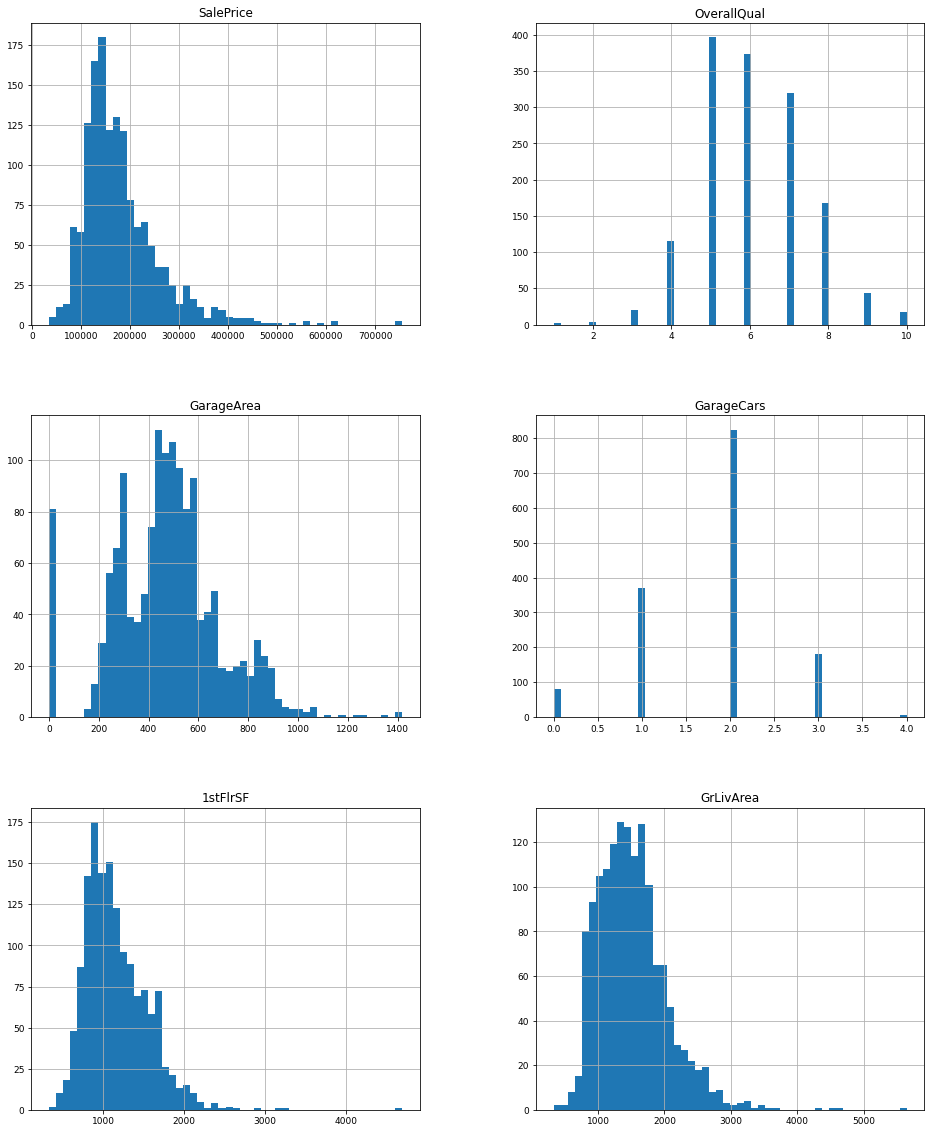

In [50]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=9, ylabelsize=9);